# Data wrangling and EDA

In [1]:
# Import the necessary libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the data 
df = pd.read_csv('../data/raw/books.csv', error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


Examine the head and tail, and get the shape, to get a feel for the data.

In [3]:
df.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [4]:
df.tail(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [5]:
df.shape

(11123, 12)

In [205]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

Right off the bat I notice that J.K. Rowling has the artist in the author category. Additionally, the publisher column has both Scholastic and Scholastic Inc. to mean the same thing. I am going to clean that up really quick. 

In [6]:
df.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)
df.replace(to_replace='Scholastic Inc.', value = 'Scholastic', inplace=True)

Columns Description:
* bookID - Contains the unique ID for each book/series
* title - Contains the titles of the books
* authors - Contains the author of the particular book
* average_rating - The average rating of the books, as decided by the users
* ISBN - ISBN(10) number, tells the information about a book - such as edition and publisher
* ISBN 13 - The new format for ISBN, implemented in 2007. 13 digits
* language_code - Tells the language for the books
* Num_pages - Contains the number of pages for the book
* Ratings_count - Contains the number of ratings given for the book
* text_reviews_count - Contains the count of reviews left by users
* publication_date - Contains the date the book was published
* publisher - Contains the company that published the book

### What books are published most? 

In [13]:
# Let's see what the books that are published the most times are
bk = df['title'].value_counts()
bk.head(10)

The Iliad                     9
The Brothers Karamazov        9
The Odyssey                   8
Anna Karenina                 8
'Salem's Lot                  8
Gulliver's Travels            8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
The Histories                 6
Macbeth                       6
Name: title, dtype: int64

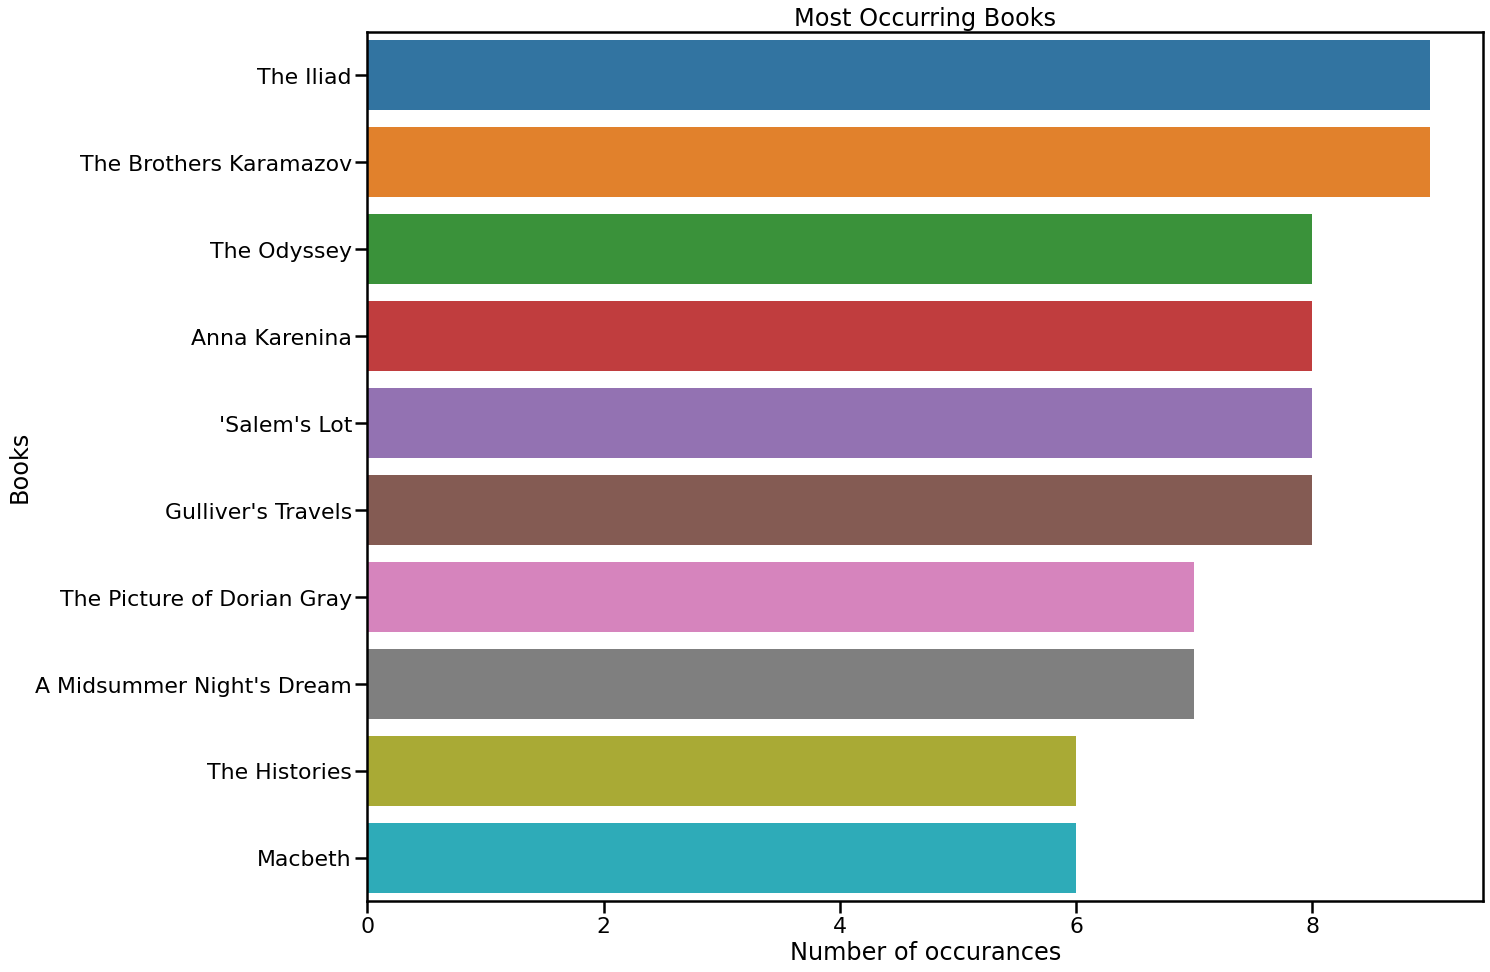

In [11]:
# Let's see what the books that are published the most times are, in graph form. 
sns.set_context('poster')
plt.figure(figsize=(20,16))

books = df['title'].value_counts()[:10]
rating = df.average_rating[:10]

sns.barplot(x = books, y = books.index)
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

From the list, we can see that most of the books from the given chart are either classics or books which are usually assigned to schools. Not surprising that they have been published a number of times! 

### What is the distribution of books for all languages?

In [45]:
# Let's see what the languages are most common 
lang_counts = df.groupby('language_code')['title'].count()
lang_counts.sort_values(ascending=False, inplace=True)
lang_counts.head()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
Name: title, dtype: int64

Text(0, 0.5, 'Number of titles in language')

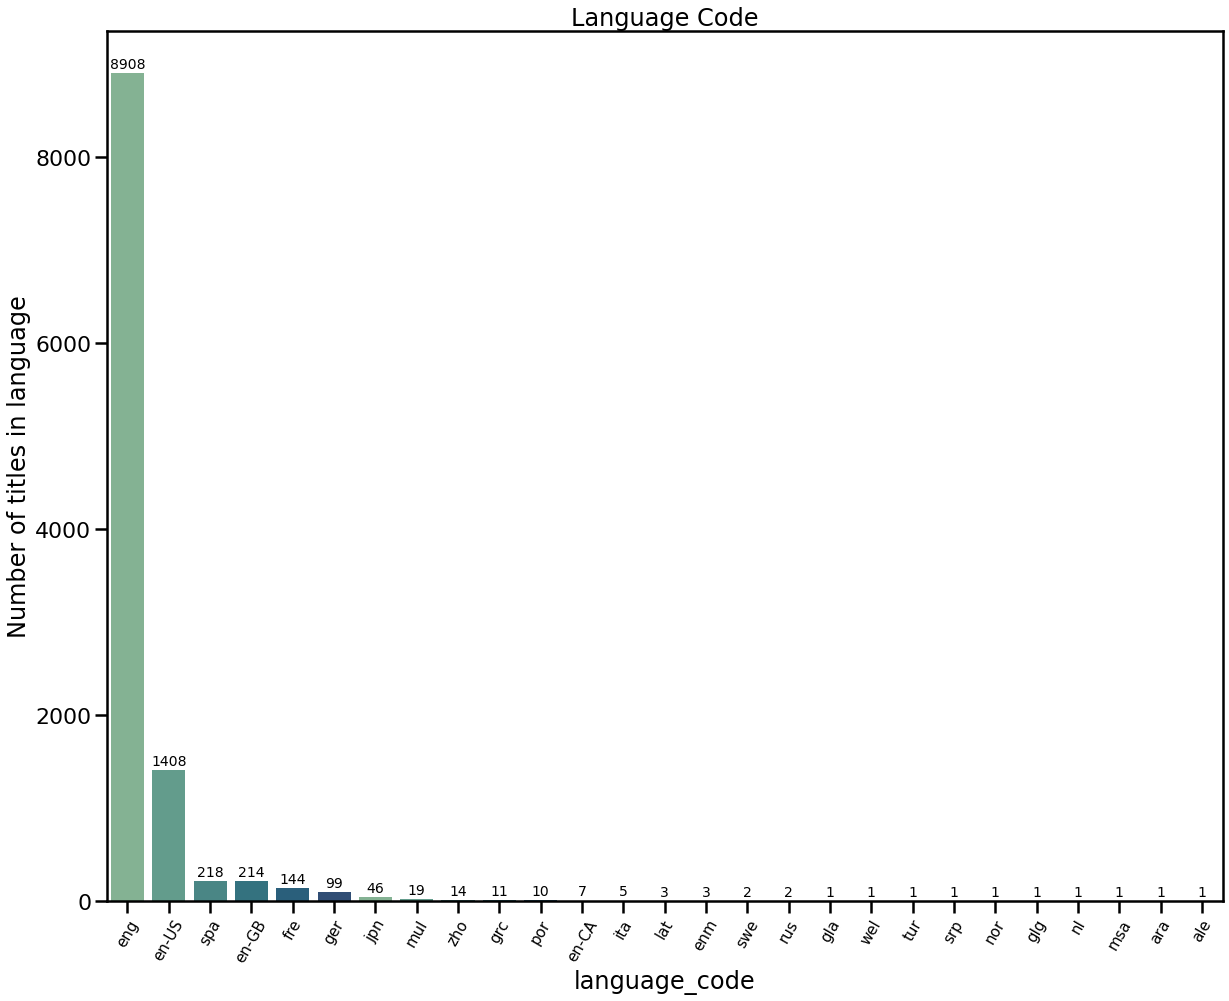

In [156]:
# Let's see what the languages are most common  in chart form
sns.set_context('poster')
plt.figure(figsize=(20,16))
plt.xticks(fontsize = 15, rotation = 60)
palette = sns.color_palette("crest")


lang_plot = sns.barplot(x=lang_counts.index, y=lang_counts, palette=palette)

for p in lang_plot.patches:
    lang_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    size = 14,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title('Language Code')
plt.xlabel("language_code")
plt.ylabel("Number of titles in language")

From the given graph, we can see that in the given data, most of the books are in english languages, with some further categorized into the region of English. The next most popular languages are Spanish, French, and German. 

### Which are the top 10 most rated books?

In [72]:
# Let's see what the most rated books are, and the top rated books
ratings_count = df.sort_values('ratings_count', ascending = False).head(10)
ratings_count[['title','average_rating','ratings_count']].head(10)

,title,average_rating,ratings_count
10336,Twilight (Twilight #1),3.59,4597666
1697,The Hobbit or There and Back Again,4.27,2530894
1462,The Catcher in the Rye,3.80,2457092
307,Angels & Demons (Robert Langdon #1),3.89,2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,4.42,2293963
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,4.36,2128944
2114,Animal Farm,3.93,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690


In [71]:
ratings_avg = df.sort_values('average_rating', ascending = False).head(10)
ratings_avg[['title','average_rating','ratings_count']].head(10)

,title,average_rating,ratings_count
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,5.0,0
9893,His Princess Devotional: A Royal Encounter Wit...,5.0,2
4788,The Diamond Color Meditation: Color Pathway to...,5.0,5
9324,Tyrannosaurus Wrecks (Stanley #1),5.0,2
9720,The Irish Anatomist: A Study of Flann O'Brien,5.0,1
4933,Bulgakov's the Master and Margarita: The Text ...,5.0,4
6775,Delwau Duon: Peintiadau Nicholas Evans = Symph...,5.0,1
9282,Oliver Wendell Holmes in Paris: Medicine Theo...,5.0,1
786,Willem de Kooning: Late Paintings,5.0,1
4125,Zone of the Enders: The 2nd Runner Official St...,5.0,2


Sorting by average rating is not particularly helpful, since many books with very few ratings have a 5.0 out of 5. 

Now I want to make a graph and see the number of ratings, as well as the average ratings for those most rated books. 

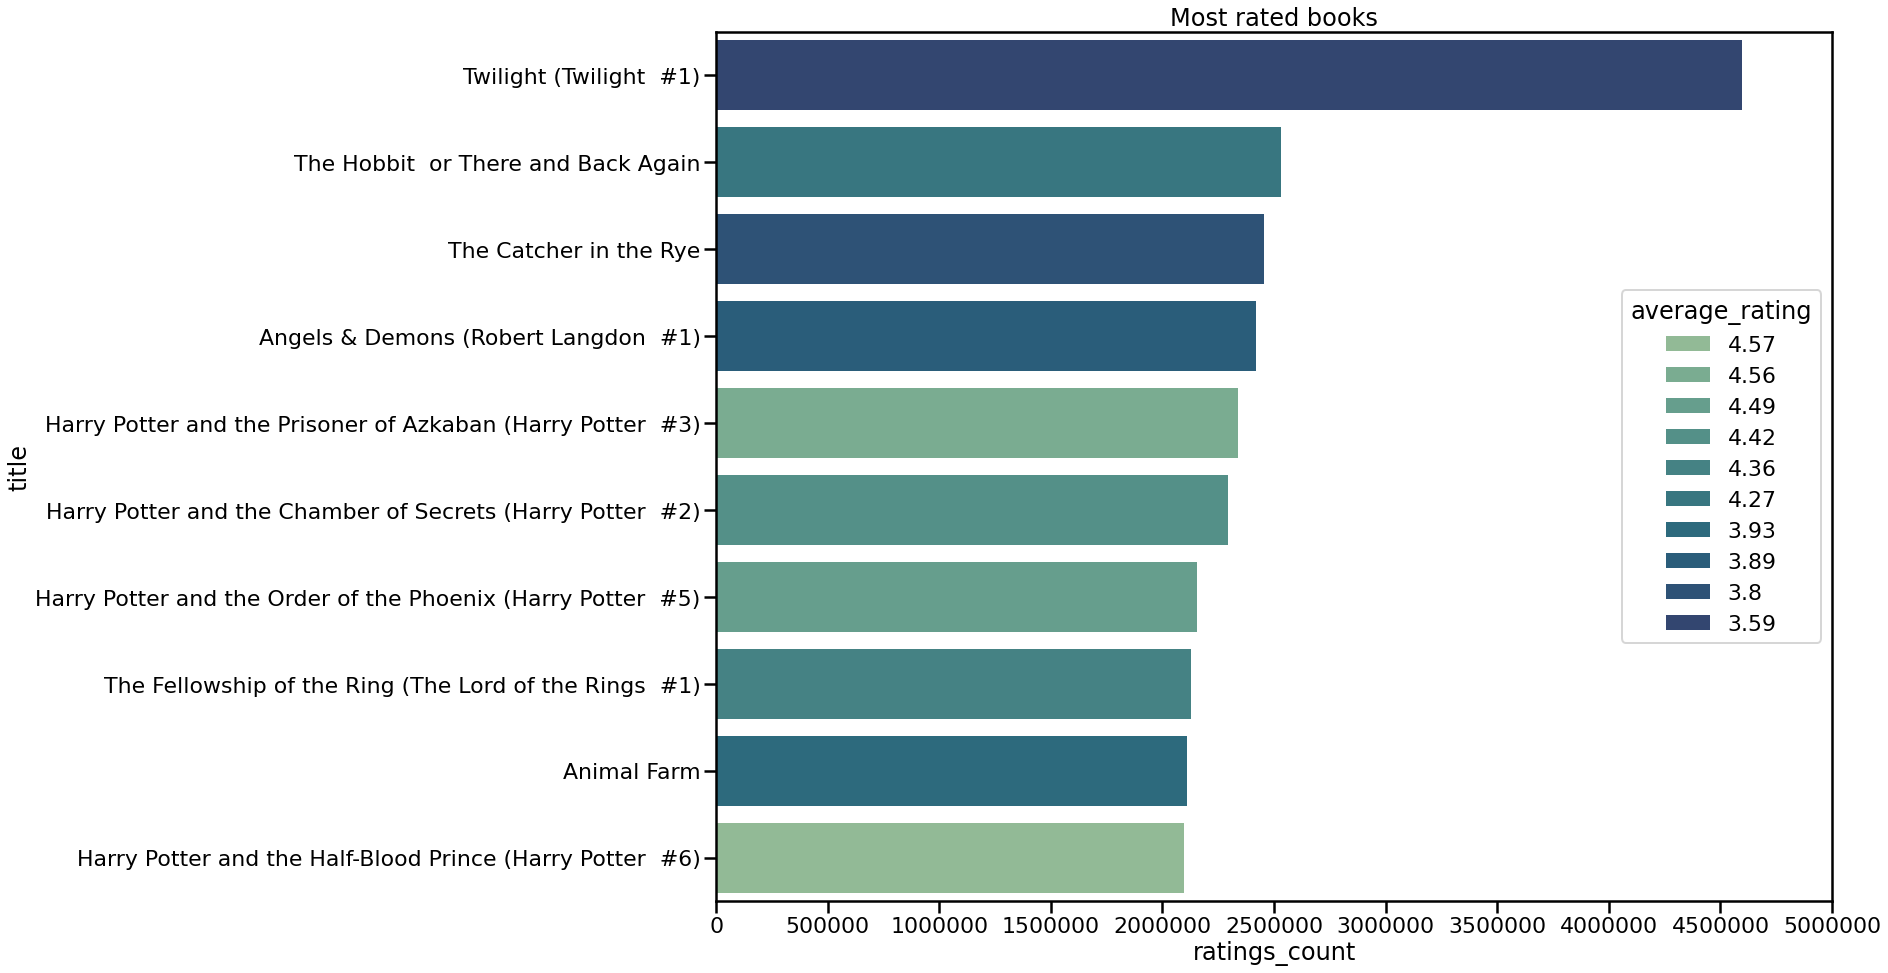

In [170]:
# Make graph showing the most rated books, and their ratings by color
sns.set_context('poster')
plt.figure(figsize=(20,16))
plt.ticklabel_format(style='plain')

hue_order = ratings_count['average_rating'].sort_values(ascending=False)
palette = sns.color_palette("crest", n_colors=10)
x_ticks=np.arange(0, 5500000, 500000)

ratings_plot = sns.barplot(x=ratings_count['ratings_count'], y=ratings_count['title'], hue=ratings_count['average_rating'],
            hue_order=hue_order, palette=palette, dodge=False)

plt.title('Most rated books')
plt.xticks(x_ticks); # The semicolon supresses output. Cool!

Here we can see The first entries tend to have the most ratings in a series, (e.g. Lord of the Rings, Angels and Demons, Twilight).

Other than The Hobbit, The Catcher in the Rye, and Animal Farm, all these books are part of a series. Mostly the Harry Potter series!)  

The first Twilight book has the most ratings by a long shot. 

It is weird to me that the first Harry Potter book is not in the top 10, given that first books in a series are popular and Harry Potter is all over the top 10 most rated books. Let's take a look at that. 

In [203]:
df[df['title'] == "Harry Potter and the Philosopher's Stone (Harry Potter  #1)"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10674,43504,Harry Potter and the Philosopher's Stone (Harr...,J.K. Rowling,4.47,158234681X,9781582346816,gla,250,11,0,7/1/2010,Bloomsbury USA Childrens


Here we see that there's only 11 ratings for this book. That can't be right; the data is not perfect. 

**In the future, I may scrape the data myself to fix issues like this.**

### Book ratings over time

Here I want to look at two things; a given year's average rating for all books, and a specific author's book rating over time. 

In [269]:
df['publication_datetime'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce')
df['publication_year'] = df['publication_datetime'].dt.year
df['publication_year'] = df['publication_year'].astype("Int64") #, errors='ignore'

In [270]:
yearly = df.groupby('publication_year')
yearly_avg = yearly.average_rating.mean()

In [271]:
yearly_avg

publication_year
1900    3.880000
1913    3.960000
1914    3.950000
1919    4.320000
1921    4.140000
          ...   
2016    3.903333
2017    3.867143
2018    4.014000
2019    3.918333
2020    3.910000
Name: average_rating, Length: 87, dtype: float64

<AxesSubplot:xlabel='publication_year', ylabel='average_rating'>

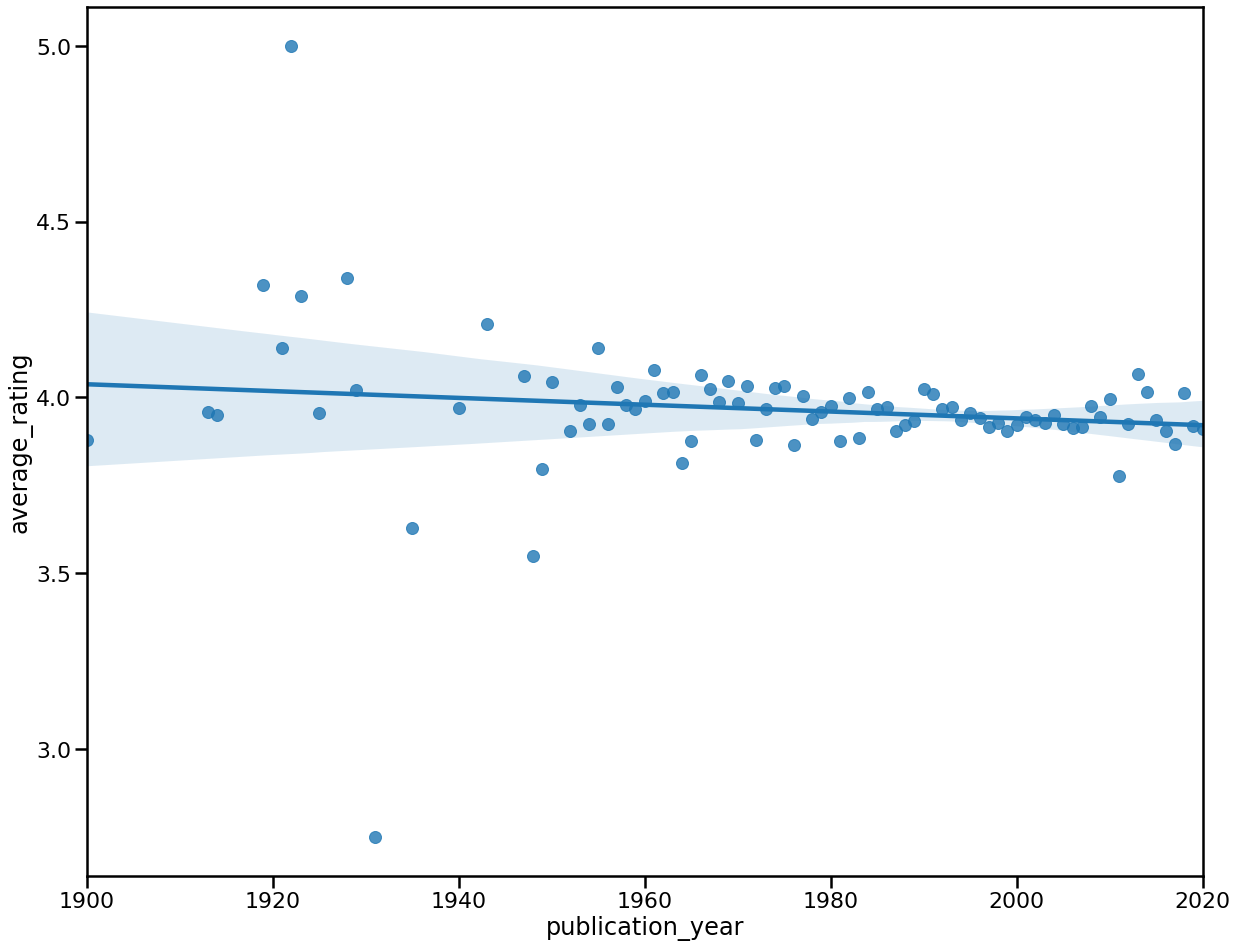

In [304]:
# a given year's average rating for all books, point plot
sns.set_context('poster')
plt.figure(figsize=(20,16))
plt.ticklabel_format(style='plain')
sns.regplot(x=yearly_avg.index, y=yearly_avg)

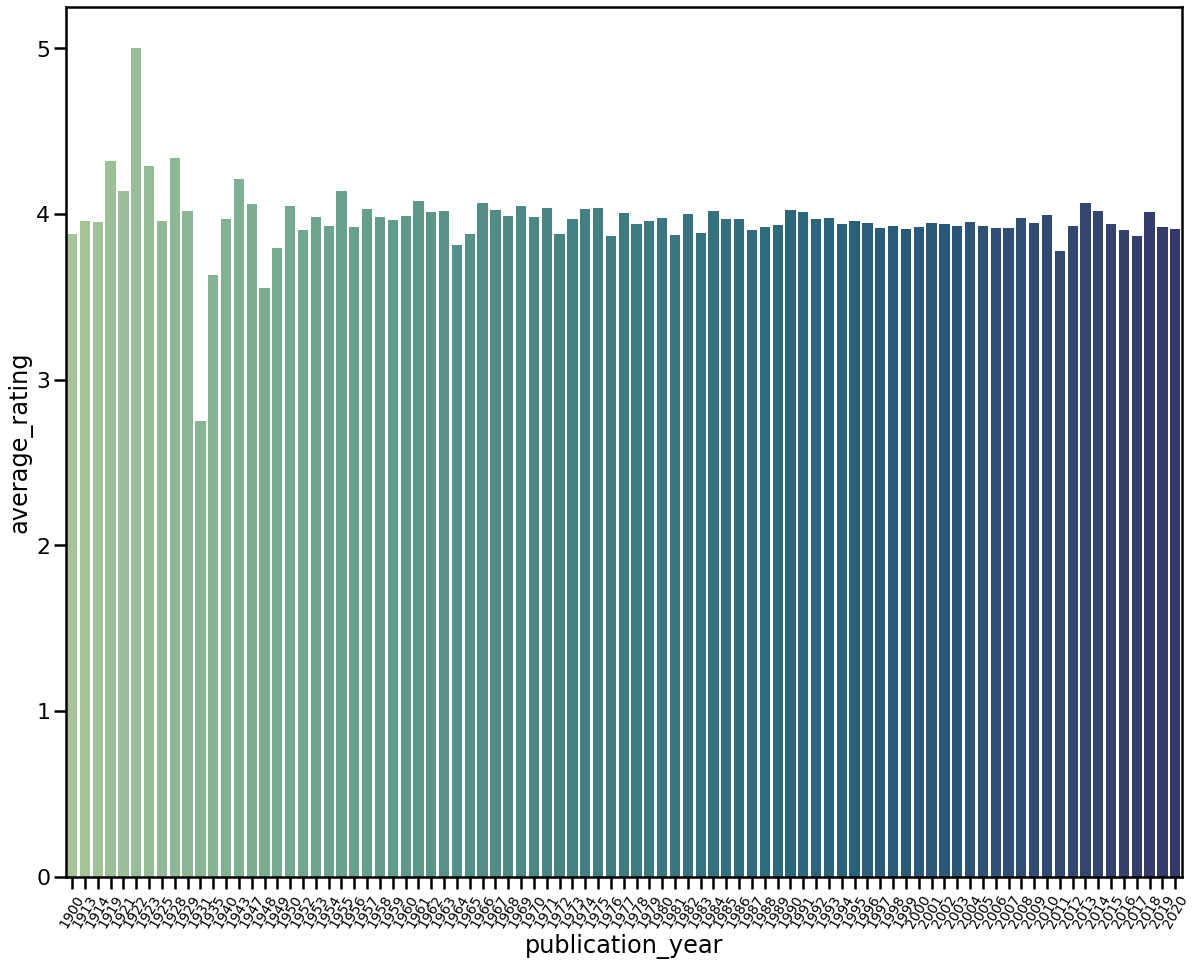

In [305]:
# a given year's average rating for all books; bar plot
sns.set_context('poster')
plt.figure(figsize=(20,16))
plt.ticklabel_format(style='plain')

hue_order = ratings_count['average_rating'].sort_values(ascending=False)
palette = sns.color_palette("crest", n_colors=len(yearly_avg.index)) #n_colors=10
x_ticks=np.arange(1900, 2022, 1)


yearly_ratings_plot = sns.barplot(x=yearly_avg.index, y=yearly_avg, palette=palette)
plt.xticks(fontsize = 14, rotation = 60);

Index(['mean'], dtype='object')


<AxesSubplot:xlabel='Year of publication', ylabel='Average rating'>

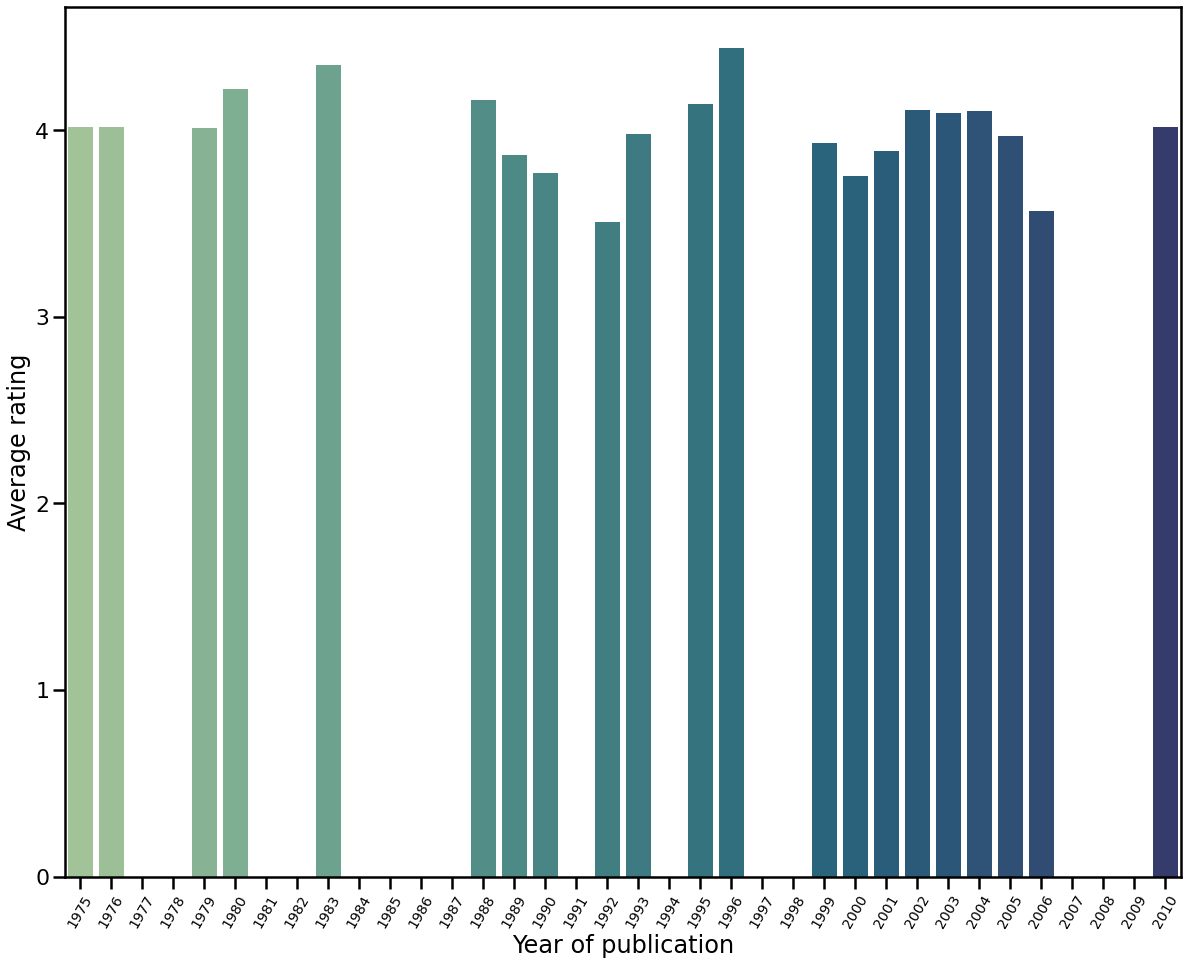

In [410]:
# specific author's book rating over time
# This one will include gaps where the author did not publish books
def author_ratings_gaps(dataframe, author):
    author_df = dataframe[dataframe['authors']==author]
    author_yearly = author_df.groupby('publication_year')['average_rating'].agg(['mean'])
    
    print(author_yearly.columns)
    plt.figure(figsize=(20,16))
    plt.ticklabel_format(style='plain')
    
    all_years=np.arange(min(author_yearly.index), max(author_yearly.index)+1, 1)
    
    # I want gaps for each year there isn't a book published, so I will add those rows with 0 values
    for year in all_years: 
        if year not in author_yearly.index: 
            author_yearly.loc[year] = 0

    author_yearly=author_yearly.sort_index()
    
    palette = sns.color_palette("crest", n_colors=len(author_yearly.index))
    
    
    yearly_ratings_plot = sns.barplot(x=author_yearly.index, y=author_yearly['mean'], palette=palette)
    
    # plot regplot with numbers 0,..,len(a) as x value
    # sns.regplot(x=np.arange(0,len(author_yearly)), y=author_yearly['mean'], ax=yearly_ratings_plot)
    # sns.despine(offset=10, trim=False)

    plt.xticks(fontsize=14, rotation=60)
    plt.ylabel("Average rating")
    plt.xlabel("Year of publication")
    
    return yearly_ratings_plot

author_ratings_gaps(df, 'Stephen King')

Index(['mean'], dtype='object')


<AxesSubplot:xlabel='Year of publication', ylabel='Average rating'>

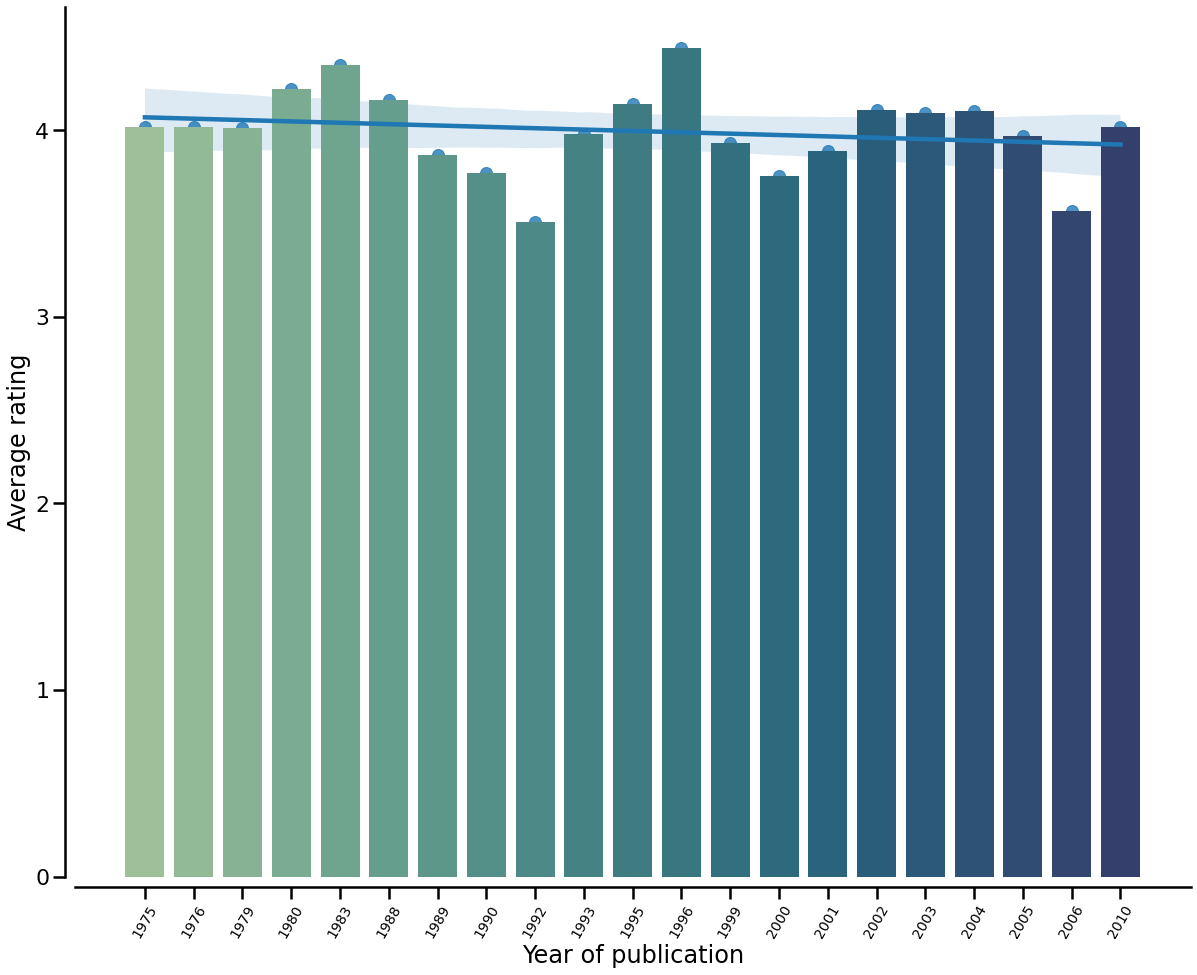

In [411]:
# specific author's book rating over time
# This function doesn't show gaps, but does overlay a trend line

def author_ratings_trend(dataframe, author):
    author_df = dataframe[dataframe['authors']==author]
    author_yearly = author_df.groupby('publication_year')['average_rating'].agg(['mean'])
    
    print(author_yearly.columns)
    plt.figure(figsize=(20,16))
    plt.ticklabel_format(style='plain')
    
    all_years=np.arange(min(author_yearly.index), max(author_yearly.index)+1, 1)
    
    # I want gaps for each year there isn't a book published, so I will add those rows with 0 values
#     for year in all_years: 
#         if year not in author_yearly.index: 
#             author_yearly.loc[year] = 0

    author_yearly=author_yearly.sort_index()
    
    palette = sns.color_palette("crest", n_colors=len(author_yearly.index))
    
    
    yearly_ratings_plot = sns.barplot(x=author_yearly.index, y=author_yearly['mean'], palette=palette)
    
    # plot regplot with numbers 0,..,len(a) as x value
    sns.regplot(x=np.arange(0,len(author_yearly)), y=author_yearly['mean'], ax=yearly_ratings_plot)
    sns.despine(offset=10, trim=False)

    plt.xticks(fontsize=14, rotation=60)
    plt.ylabel("Average rating")
    plt.xlabel("Year of publication")
    
    return yearly_ratings_plot

author_ratings_plot(df, 'Stephen King')

In [412]:
# Who are the top publishing authors? 
df['authors'].value_counts().head(10)

Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: authors, dtype: int64

Index(['mean'], dtype='object')
Index(['mean'], dtype='object')


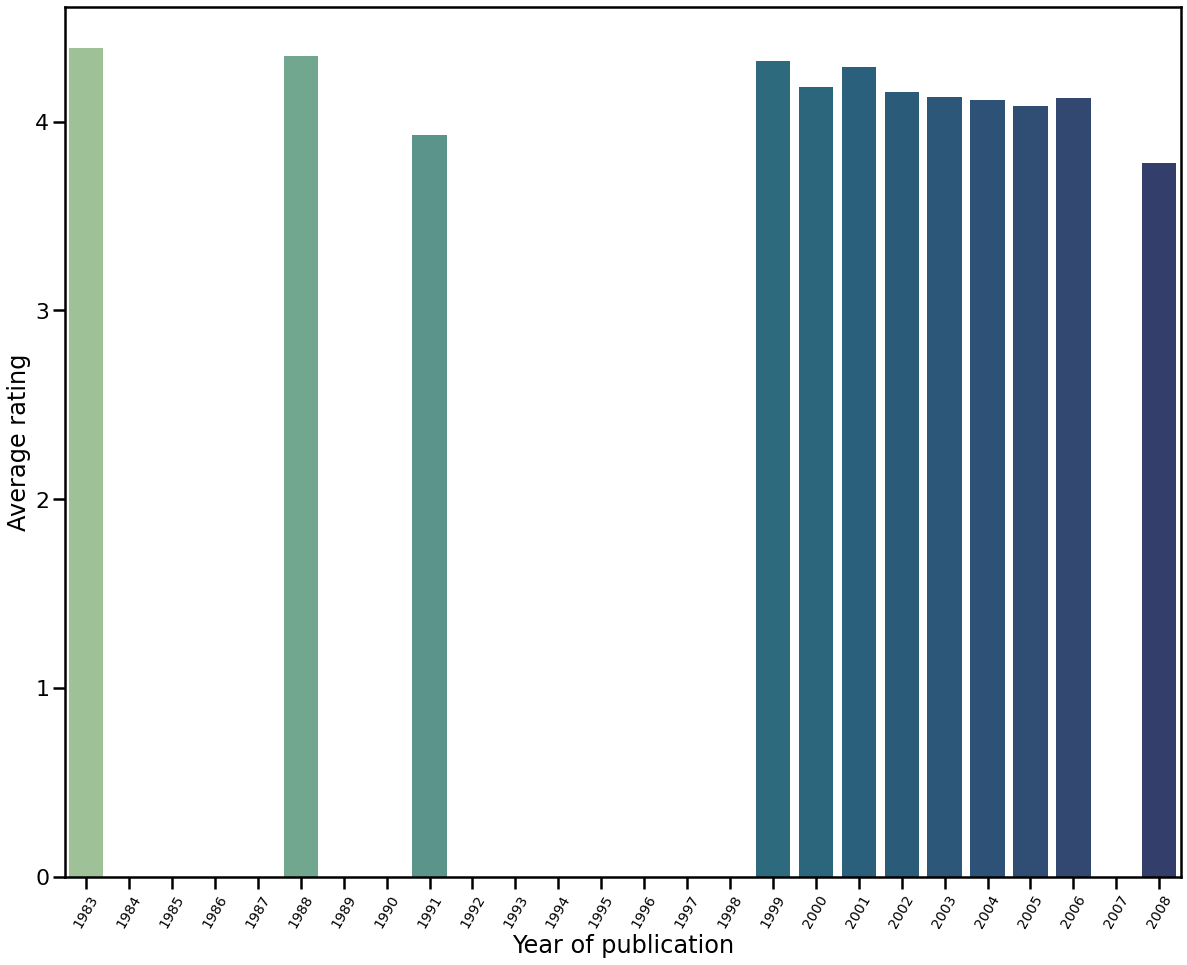

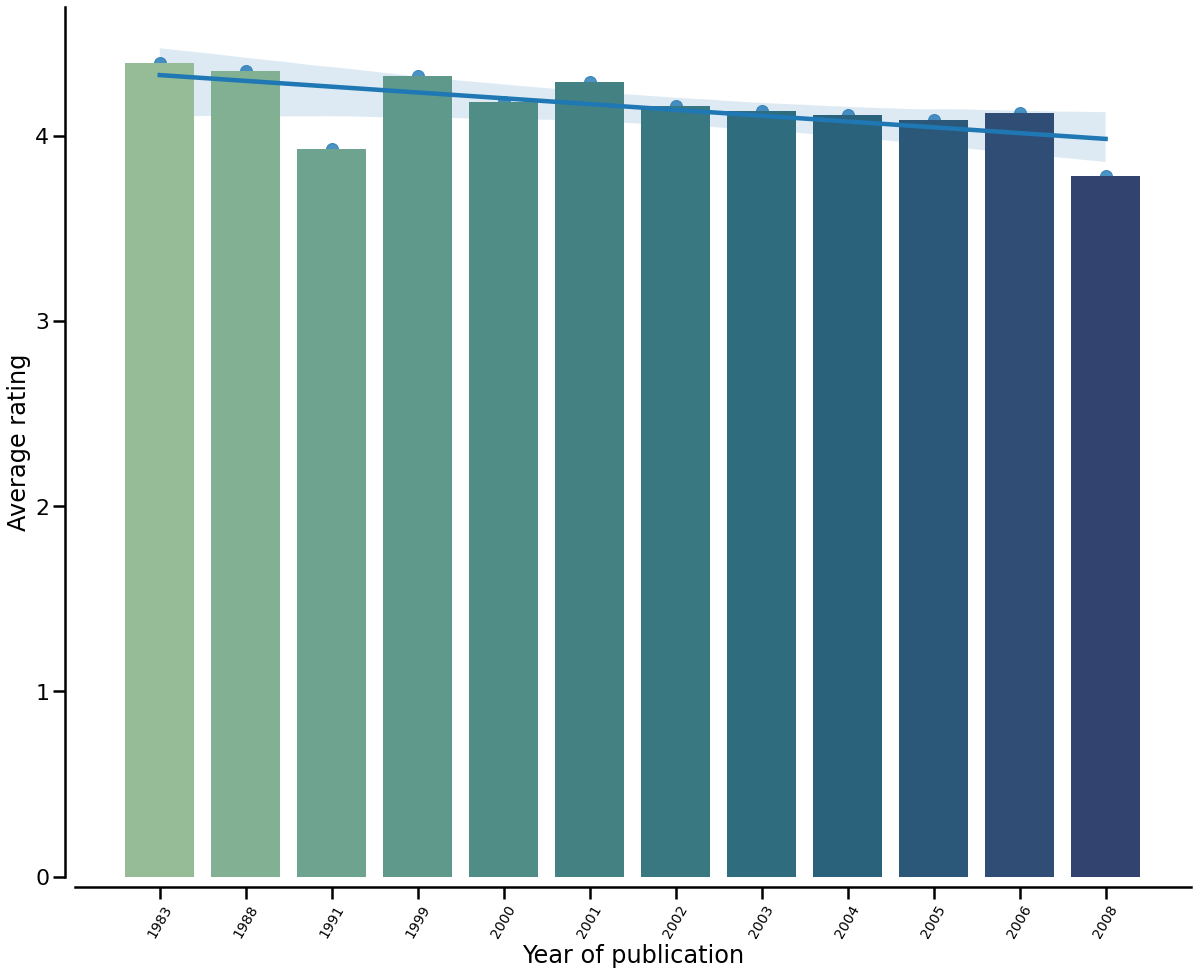

In [417]:
plot_gaps = author_ratings_gaps(df, 'P.G. Wodehouse')
plot_trend = author_ratings_trend(df, 'P.G. Wodehouse')

Index(['mean'], dtype='object')
Index(['mean'], dtype='object')


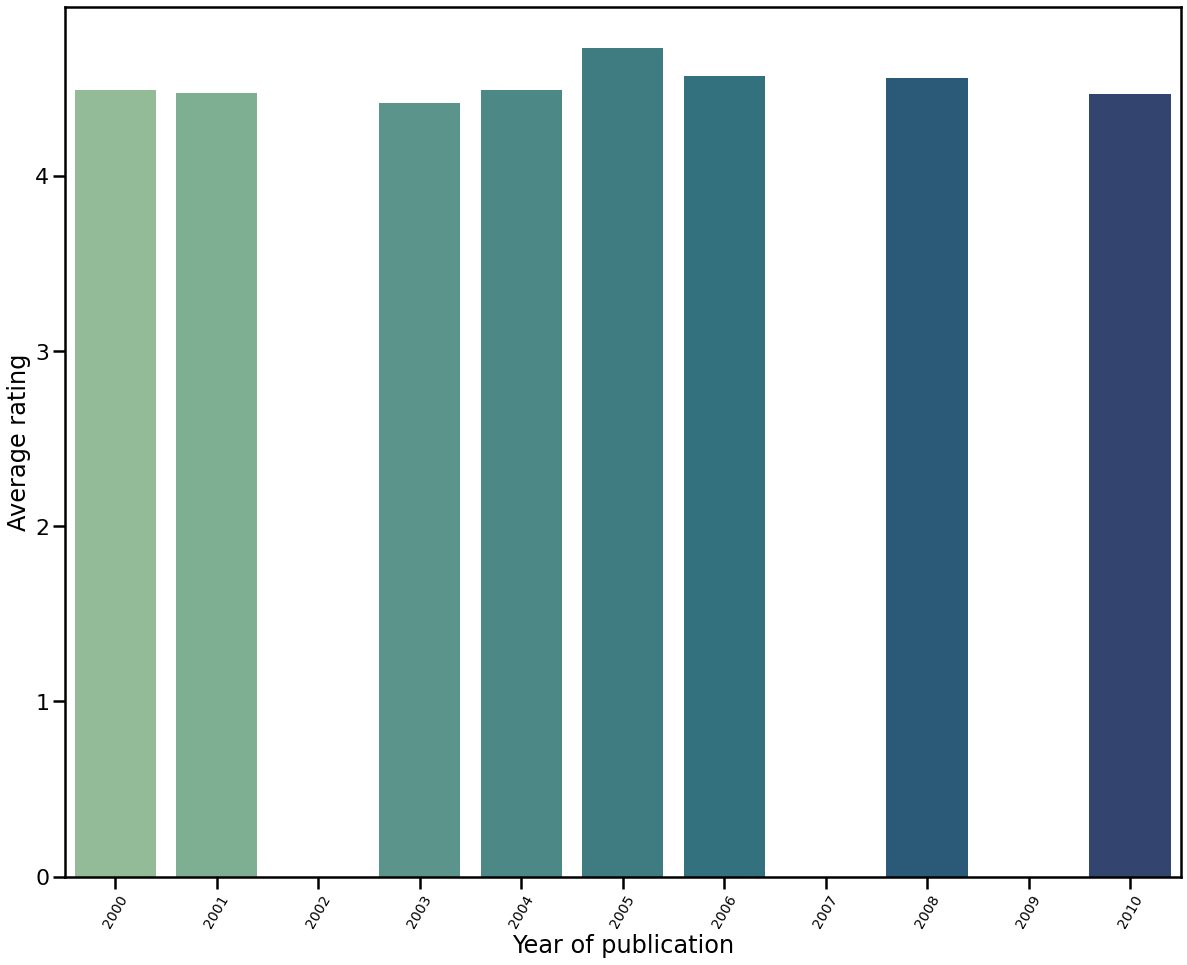

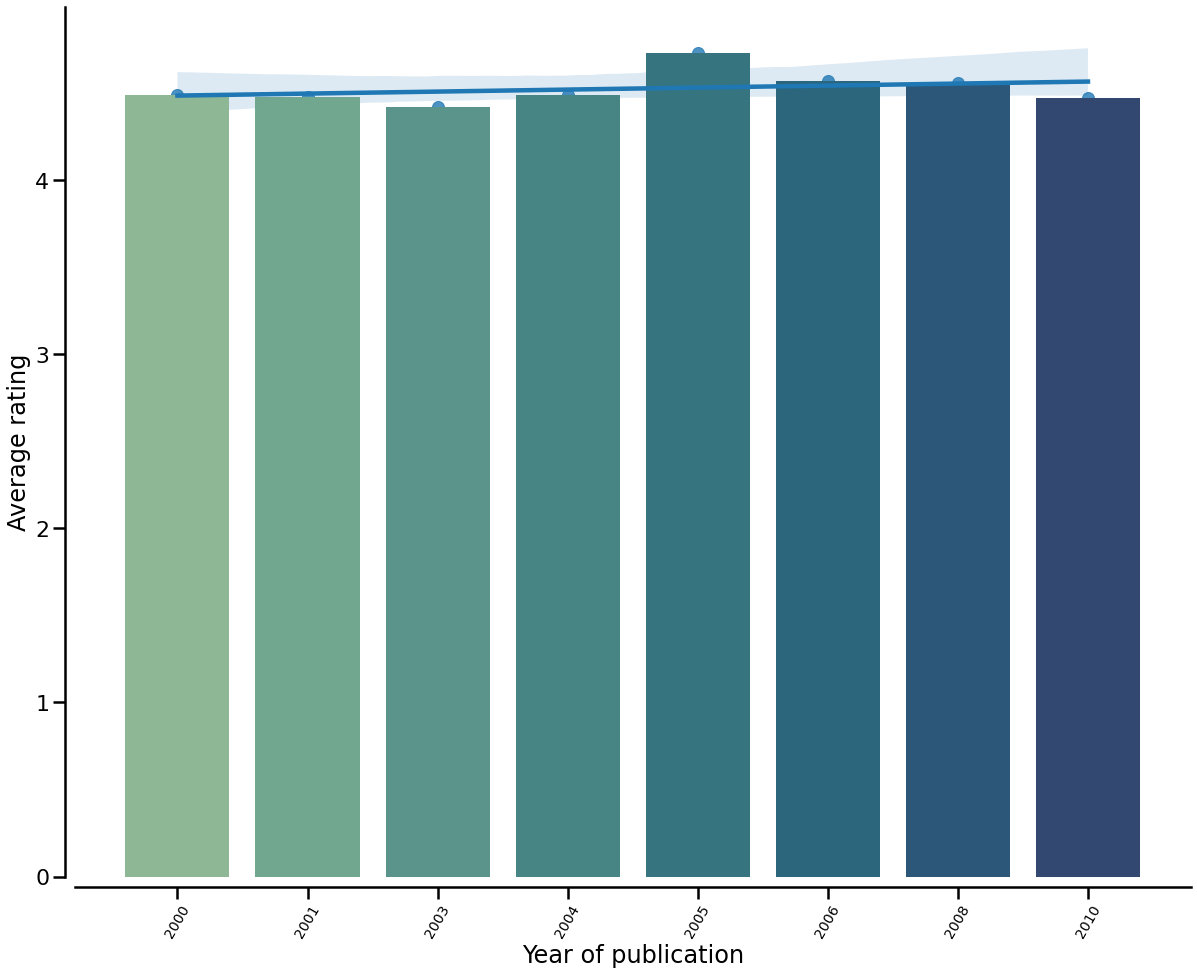

In [418]:
plot_gaps = author_ratings_gaps(df, 'J.K. Rowling')
plot_trend = author_ratings_trend(df, 'J.K. Rowling')